**<font color = 'blue' size = 38>DATA ANALYSIS & VISUALIZATION</font>**

# <font color = "Orange">Code from Exercise 2</font>

In [1]:
# Import all modules that are required
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
# Setting up 'requests' to make HTTPS requests properly takes some extra steps... we'll skip them for now.
requests.packages.urllib3.disable_warnings()
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [14]:
def get_data(url):
  snapshot_url = url
  snapshot = requests.get(snapshot_url)
  soup = BeautifulSoup(snapshot.text,'html.parser')
  card_titles = soup.select('.Card-title')
  card_times = soup.select('.Card-time')
  card_classes = soup.select('.Card-eyebrow')
  matrix = []
  class_url = url.split('/')[-2]
  for i in range(0,len(card_titles)):
    d = card_times[i].text
    date_list=[]
    if 'Ago' in d or 'min' in d or 'sec' in d or 'hour' in d:
      today = date.today()
      date_list=[today.day,today.month]
    else:
      pom = d.split(' ')
      date_list = [int(pom[2][:-2]),datetime.strptime(pom[1],'%b').month]
    redica = [card_titles[i].select_one('div').text,card_times[i].text,date_list[0],date_list[1]]
    if i<5:
      redica.append('Top news ' +  class_url)
    else:
      redica.append(card_classes[i-5].select_one('div').text)
    matrix.append(redica)
  df = pd.DataFrame(np.array(matrix),columns = ['Title','Date','Day','Month','Class'])
  return df
    

In [15]:
df_finance = get_data('https://www.cnbc.com/finance/')

In [16]:
df_health = get_data('https://www.cnbc.com/health-and-science/')

In [17]:
df_finance

,Title,Date,Day,Month,Class
0,Start-up Alchemy's valuation skyrockets as dig...,2 hours ago,28,10,Top news finance
1,Watch Christine Lagarde speaking after the ECB...,3 hours ago,28,10,Top news finance
2,Stocks making the biggest moves premarket: Com...,4 hours ago,28,10,Top news finance
3,"Bitcoin, housing and parts of tech are in a da...",4 hours ago,28,10,Top news finance
4,China is ramping up coal imports from Russia —...,"Thu, Oct 28th 2021",28,10,Top news finance
5,"Nasdaq climbs more than 1%, hits record high a...",18 min ago,28,10,Markets
6,Stocks making the biggest moves after hours: F...,"Wed, Oct 27th 2021",27,10,Market Insider
7,Bitcoin futures ETF may be a costly way to get...,"Wed, Oct 27th 2021",27,10,Personal Finance
8,Stocks making the biggest moves midday: Twitte...,"Wed, Oct 27th 2021",27,10,Market Insider
9,Stocks making the biggest moves before the bel...,"Wed, Oct 27th 2021",27,10,Market Insider


In [18]:
df_health

,Title,Date,Day,Month,Class
0,Biden outlines plan to expand U.S. health prog...,an hour ago,28,10,Top news health-and-science
1,Merck ready to deploy tens of millions of its ...,2 hours ago,28,10,Top news health-and-science
2,Some 5% of unvaccinated adults quit jobs over ...,an hour ago,28,10,Top news health-and-science
3,"Texas, DOJ and abortion providers file argumen...","Wed, Oct 27th 2021",27,10,Top news health-and-science
4,Some immunocompromised people can receive a 4t...,"Wed, Oct 27th 2021",27,10,Top news health-and-science
5,White House: 1.5 million in U.S. got a Moderna...,"Wed, Oct 27th 2021",27,10,Health and Science
6,"California setting up 4,000 sites to administe...","Wed, Oct 27th 2021",27,10,Health and Science
7,Theranos investor Betsy DeVos was misled by El...,"Tue, Oct 26th 2021",26,10,Tech
8,FDA panel recommends Pfizer's low-dose Covid v...,"Wed, Oct 27th 2021",27,10,Health and Science
9,CDC extends Covid restrictions for cruise ship...,"Tue, Oct 26th 2021",26,10,Health and Science


#<font color = 'orange'> Save and read .CSV </font>


In [23]:
df_finance.to_csv("/content/drive/My Drive/dataset_finance.csv",index = False)

In [24]:
df_health.to_csv("/content/drive/My Drive/dataset_health.csv", index = False)

In [25]:
df_finance = pd.read_csv('/content/drive/My Drive/dataset_finance.csv')

In [26]:
df_health = pd.read_csv('/content/drive/My Drive/dataset_health.csv')

In [27]:
df_finance

,Title,Date,Day,Month,Class
0,Start-up Alchemy's valuation skyrockets as dig...,2 hours ago,28,10,Top news finance
1,Watch Christine Lagarde speaking after the ECB...,3 hours ago,28,10,Top news finance
2,Stocks making the biggest moves premarket: Com...,4 hours ago,28,10,Top news finance
3,"Bitcoin, housing and parts of tech are in a da...",4 hours ago,28,10,Top news finance
4,China is ramping up coal imports from Russia —...,"Thu, Oct 28th 2021",28,10,Top news finance
5,"Nasdaq climbs more than 1%, hits record high a...",18 min ago,28,10,Markets
6,Stocks making the biggest moves after hours: F...,"Wed, Oct 27th 2021",27,10,Market Insider
7,Bitcoin futures ETF may be a costly way to get...,"Wed, Oct 27th 2021",27,10,Personal Finance
8,Stocks making the biggest moves midday: Twitte...,"Wed, Oct 27th 2021",27,10,Market Insider
9,Stocks making the biggest moves before the bel...,"Wed, Oct 27th 2021",27,10,Market Insider


# <font color = 'orange'> Some quick EDA</font>

In [28]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   34 non-null     object
 1   Date    34 non-null     object
 2   Day     34 non-null     int64 
 3   Month   34 non-null     int64 
 4   Class   34 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [29]:
df_finance.head()


,Title,Date,Day,Month,Class
0,Start-up Alchemy's valuation skyrockets as dig...,2 hours ago,28,10,Top news finance
1,Watch Christine Lagarde speaking after the ECB...,3 hours ago,28,10,Top news finance
2,Stocks making the biggest moves premarket: Com...,4 hours ago,28,10,Top news finance
3,"Bitcoin, housing and parts of tech are in a da...",4 hours ago,28,10,Top news finance
4,China is ramping up coal imports from Russia —...,"Thu, Oct 28th 2021",28,10,Top news finance


In [30]:
df_top_news= df_finance[df_finance.Class == 'Top News finance']
df_top_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   0 non-null      object
 1   Date    0 non-null      object
 2   Day     0 non-null      int64 
 3   Month   0 non-null      int64 
 4   Class   0 non-null      object
dtypes: int64(2), object(3)
memory usage: 0.0+ bytes


In [31]:
df_top_news.sort_values('Day').head()


,Title,Date,Day,Month,Class


In [32]:
df = pd.concat([df_finance,df_health],ignore_index=True)
df

,Title,Date,Day,Month,Class
0,Start-up Alchemy's valuation skyrockets as dig...,2 hours ago,28,10,Top news finance
1,Watch Christine Lagarde speaking after the ECB...,3 hours ago,28,10,Top news finance
2,Stocks making the biggest moves premarket: Com...,4 hours ago,28,10,Top news finance
3,"Bitcoin, housing and parts of tech are in a da...",4 hours ago,28,10,Top news finance
4,China is ramping up coal imports from Russia —...,"Thu, Oct 28th 2021",28,10,Top news finance
...,...,...,...,...,...
63,Australia says it's in the 'final stages' of o...,"Fri, Oct 22nd 2021",22,10,Asia Economy
64,Scientists turn durian waste into bandages — a...,"Sun, Oct 24th 2021",24,10,Asia-Pacific News
65,"CDC OKs Moderna and J&J Covid boosters, allowi...","Fri, Oct 22nd 2021",22,10,Health and Science
66,"American, Southwest CEOs: No plans to fire emp...","Thu, Oct 21st 2021",21,10,Airlines


In [33]:
df.to_csv('/content/drive/My Drive/dataset_exercise3.csv', index=False)

In [34]:
df = pd.read_csv('/content/drive/My Drive/dataset_exercise3.csv')

In [35]:
df

,Title,Date,Day,Month,Class
0,Start-up Alchemy's valuation skyrockets as dig...,2 hours ago,28,10,Top news finance
1,Watch Christine Lagarde speaking after the ECB...,3 hours ago,28,10,Top news finance
2,Stocks making the biggest moves premarket: Com...,4 hours ago,28,10,Top news finance
3,"Bitcoin, housing and parts of tech are in a da...",4 hours ago,28,10,Top news finance
4,China is ramping up coal imports from Russia —...,"Thu, Oct 28th 2021",28,10,Top news finance
...,...,...,...,...,...
63,Australia says it's in the 'final stages' of o...,"Fri, Oct 22nd 2021",22,10,Asia Economy
64,Scientists turn durian waste into bandages — a...,"Sun, Oct 24th 2021",24,10,Asia-Pacific News
65,"CDC OKs Moderna and J&J Covid boosters, allowi...","Fri, Oct 22nd 2021",22,10,Health and Science
66,"American, Southwest CEOs: No plans to fire emp...","Thu, Oct 21st 2021",21,10,Airlines


## <font color ='Orange'> Continuous variables</font>

In [36]:
df_health.median()

Day      25.0
Month    10.0
dtype: float64

In [37]:
df_health['Day'].median()

25.0

In [38]:
df_finance.median()

Day      26.0
Month    10.0
dtype: float64

In [39]:
df.median()

Day      26.0
Month    10.0
dtype: float64

In [40]:
df.std()

Day      2.010726
Month    0.000000
dtype: float64

In [41]:
df.min()

Title    4 charts show how Covid vaccines are working i...
Date                                            18 min ago
Day                                                     21
Month                                                   10
Class                                     5 Things to Know
dtype: object

In [42]:
df.max()

Title    Without firm school mask mandate deadlines, 'w...
Date                                           an hour ago
Day                                                     28
Month                                                   10
Class                                       World Politics
dtype: object

In [43]:
df.quantile([.1, .25, .5, .75], axis = 0) 


,Day,Month
0.10,22.0,10.0
0.25,25.0,10.0
0.50,26.0,10.0
0.75,27.0,10.0


In [44]:
#Geometric Mean of the column in dataframe

from scipy import stats

stats.gmean(df.iloc[:,2:4],axis=0)


array([25.24192529, 10.        ])

## <font color='Orange'> Categorical variables</font>

In [45]:
df_finance.Class.value_counts()

Market Insider      9
Markets             6
Top news finance    5
Finance             4
Personal Finance    3
Trading Nation      2
China Economy       2
Banks               1
World Politics      1
Tech                1
Name: Class, dtype: int64

In [46]:
df_health.Class.value_counts()

Health and Science             17
Top news health-and-science     5
5 Things to Know                3
Tech                            2
Raising Successful Kids         1
Trade                           1
Food & Beverage                 1
Asia Economy                    1
At Work                         1
Airlines                        1
Asia-Pacific News               1
Name: Class, dtype: int64

In [47]:
df.Class.value_counts()

Health and Science             17
Market Insider                  9
Markets                         6
Top news finance                5
Top news health-and-science     5
Finance                         4
5 Things to Know                3
Personal Finance                3
Tech                            3
Trading Nation                  2
China Economy                   2
Airlines                        1
Asia-Pacific News               1
World Politics                  1
Asia Economy                    1
At Work                         1
Raising Successful Kids         1
Banks                           1
Trade                           1
Food & Beverage                 1
Name: Class, dtype: int64

# <font color = 'Orange'>Data visualization</font>

## <font color ='Orange'> Distribution</font>

In [48]:
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

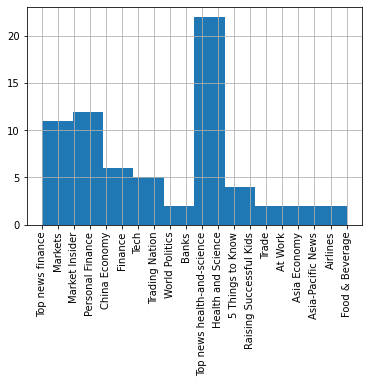

In [49]:
df['Class'].hist()
plt.xticks(rotation = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13ed4d37d0>,
      dtype=object)

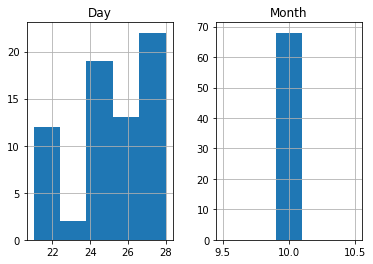

In [50]:
df.hist(bins = 5)

<Figure size 432x288 with 0 Axes>

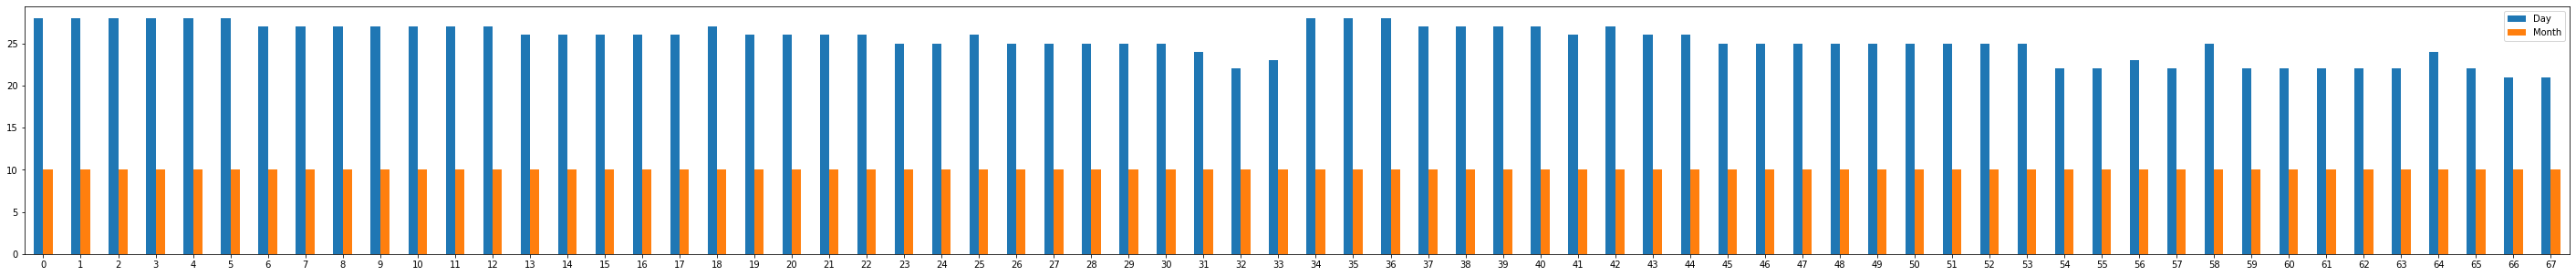

In [51]:
fig = plt.figure()
df.plot.bar(rot=0,figsize=(50,5))
fig.show()

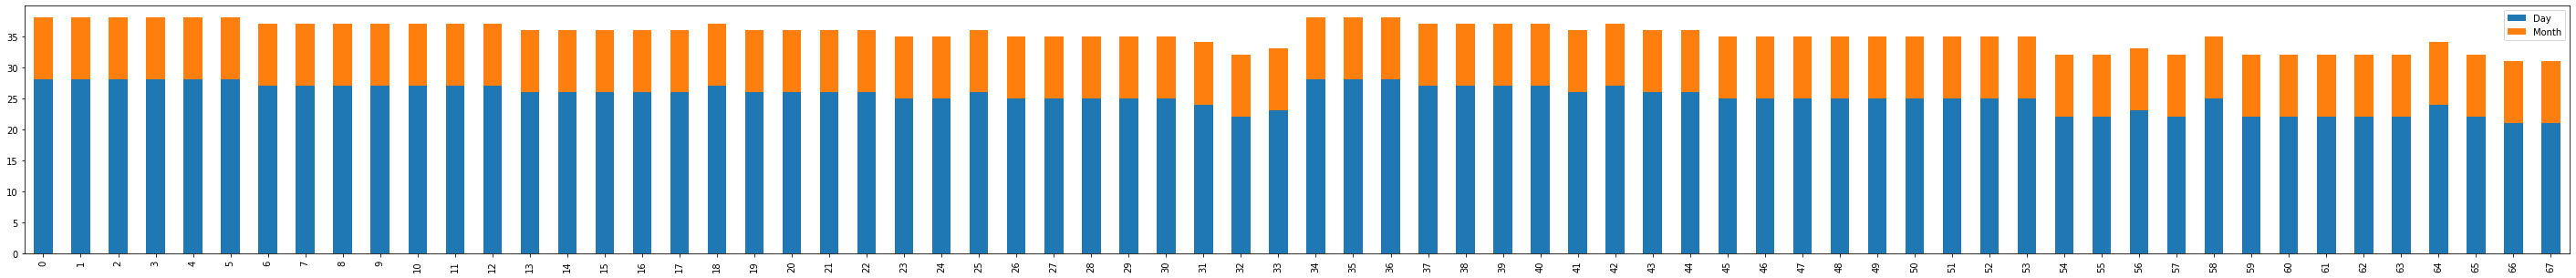

In [52]:
 df.plot.bar(stacked=True,figsize=(50,5))

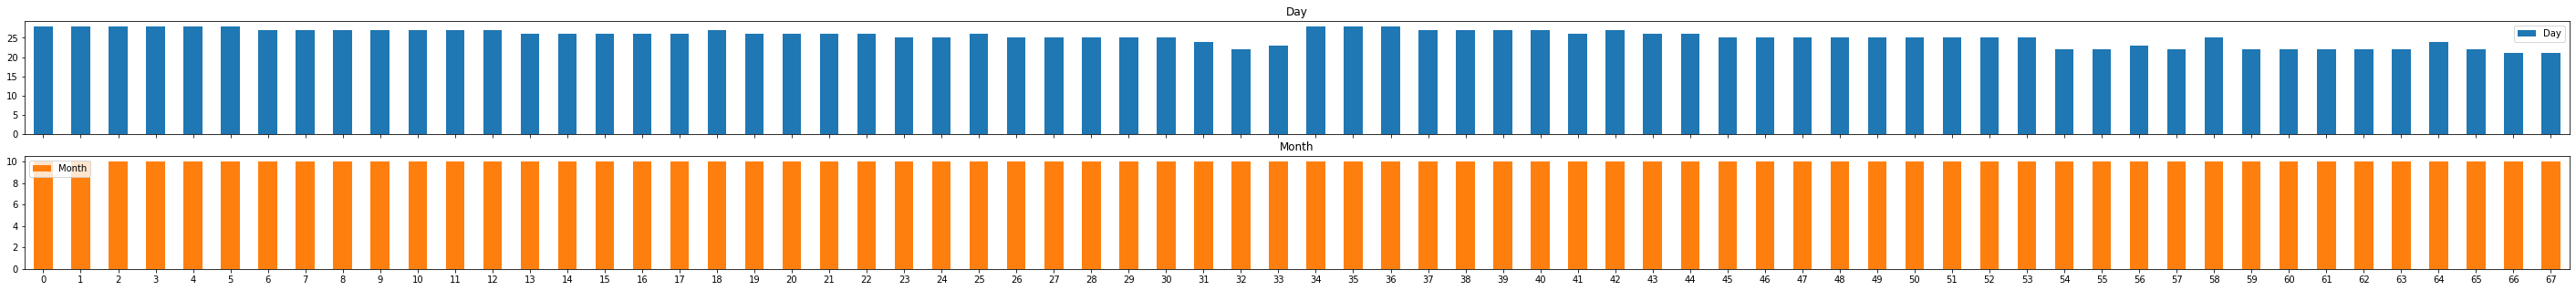

In [53]:
axes = df.plot.bar(rot=0, subplots=True,figsize=(50,5))
axes[1].legend(loc=2)

## <font color = 'Orange'>Show trend over time </font>

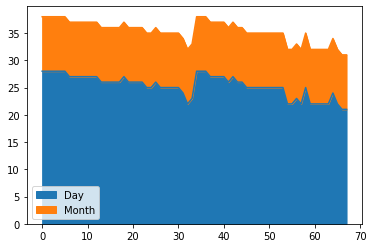

In [54]:
df.plot.area()

## <font color = 'Orange'>Relationship</font>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

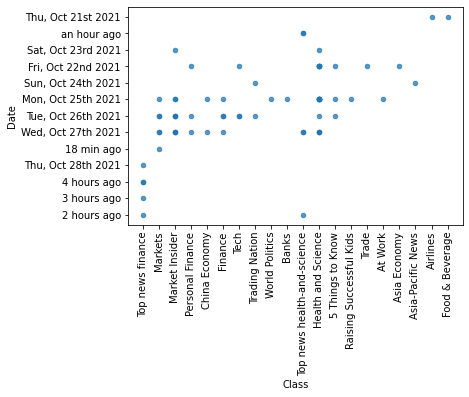

In [55]:
fig = plt.figure()
df.plot.scatter(x= 'Class', y = 'Date', alpha = 0.75,rot=0)
plt.xticks(rotation=90)



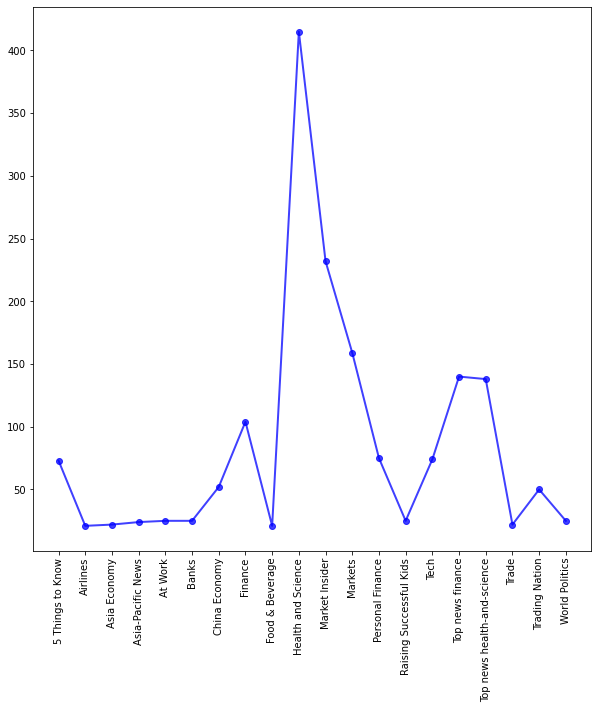

In [56]:
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=[10,10])
plt.plot(df.groupby('Class').Day.sum(),  '-ob', linewidth='2', alpha = 0.75)
plt.xticks(rotation=90)
plt.show()

## <font color = 'Orange'>Comparison</font>

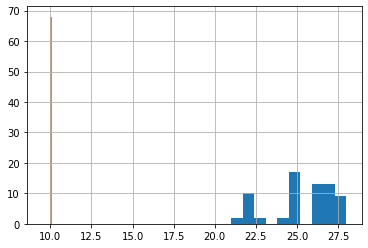

In [57]:
df['Day'].hist()
df['Month'].hist()

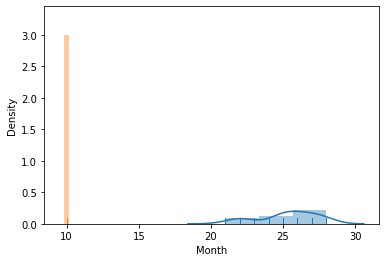

In [58]:
import seaborn as sns
line_up=sns.distplot(df['Day'], bins=3, kde=True, rug=True,label='Day')

line_down=sns.distplot(df['Month'], bins=3, kde=True, rug=True,label = 'Month')

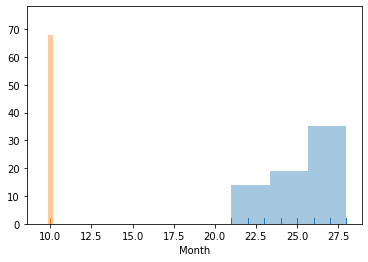

In [59]:
import seaborn as sns
line_up=sns.distplot(df['Day'], bins=3, kde=False, rug=True,label='Day')

line_down=sns.distplot(df['Month'], bins=3, kde=False, rug=True,label = 'Month')

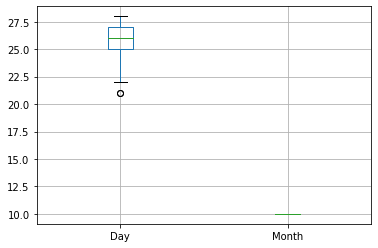

In [60]:
boxplot = df.boxplot(column=['Day', 'Month'])